# Case Study : Questions

**1. Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.**


**2. Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.**


**3. After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**


**4. Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**


**5. Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("startup_funding.csv",encoding='utf-8')

# ANSWER - 1

In [3]:
# copy data in a different variable, so that data does not alter
data_file=data.copy()

# drop that rows where "CityLocation" has nan values
index=data_file[data_file["CityLocation"].isna()].index
data_file.drop(index,inplace=True)

# seperate the city where multiple location had given
def seperatecity(city):
    return city.split('/')[0].strip()
data_file["CityLocation"]=data_file["CityLocation"].apply(seperatecity)

# replace the 'Delhi' in 'New Delhi' and 'bangalore' in 'Bangalore'
data_file["CityLocation"].replace('Delhi','New Delhi',inplace=True)
data_file["CityLocation"].replace('bangalore','Bangalore',inplace=True)

# select the data where city location is as given in question and count how many time cities 
# recieved fund and store in city_data
city_data=data_file[(data_file["CityLocation"]=="Bangalore") | 
                    (data_file["CityLocation"]=="Mumbai") |
                    (data_file["CityLocation"]=="New Delhi") |
                    (data_file["CityLocation"]=="Gurgaon") |
                    (data_file["CityLocation"]=="Noida")]["CityLocation"].value_counts()

# from city_data name of cities store in city_name and funding counts of cities store in city_funding_count
city_name=city_data.index
city_funding_count=city_data.values

# print city_name and funding_count
for i in range(len(city_name)):
    print(city_name[i],city_funding_count[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


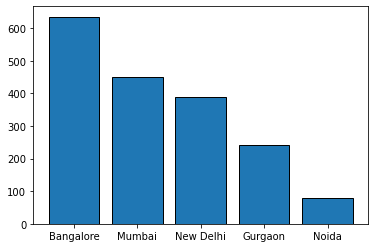

In [4]:
# plot a bar graph between city names and how many time they received fund
plt.bar(city_name,city_funding_count,edgecolor="black")
plt.show()

# ANSWER - 2

In [5]:
# copy data in a different variable, so that data does not alter
data_file = data.copy()

# drop that rows where "InvestorsName" has nan values
index=data_file[data_file["InvestorsName"].isna()].index
data_file.drop(index,inplace=True)

# count the how many time which investor invest and store in dictionary investor_count
def investors_names(arr):
    d={}
    for i in arr:
        if ',' not in i:
            d[i]=d.get(i,0)+1
        else:
            string=i.strip().split(',')
            for j in string:
                d[j.strip()]=d.get(j.strip(),0)+1
    return d
investor_count=investors_names(data_file['InvestorsName'])

# construct a dataframe from investor_count and store in investor_names_count
investor_names_count=pd.DataFrame(list(investor_count.values()),list(investor_count.keys()))

# sort values of investor_names_count in ascending order
investor_names_count=investor_names_count.sort_values(by=0,ascending=False)

# print top 5 investors
for i in range(5):
    print(investor_names_count.index[i],investor_names_count.values[i][0])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


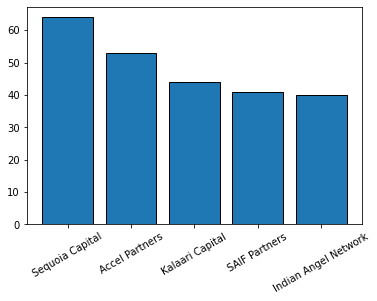

In [6]:
# plot a bar graph between top 5 Investors names and how many times they invest in startups
index=investor_names_count.index[0:5]
values=[]
for i in range(5):
    values.append(investor_names_count.values[i][0])
plt.bar(index,values,edgecolor="black")
plt.xticks(rotation=30)
plt.show()

# ANSWER - 3

In [7]:
# copy data in a different variable, so that data does not alter
data_file=data.copy()

# drop that rows where "InvestorsName" has nan values ans then reset the index
index=data_file[data_file["InvestorsName"].isna()].index
data_file.drop(index,inplace=True)
data_file=data_file.reset_index(drop=True)

# Correcting the errors in startup names of important startups Ola,Oyo,Flipkart,Paytm
# by replace the error name with correct name
data_file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data_file['StartupName'].replace('Olacabs','Ola',inplace=True)
data_file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data_file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data_file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data_file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

# Count the how many times investors invest in different companies
def investor_startup(arr1,arr2):
    d={}
    l=[]
    for i in range(len(arr1)):
        if ',' not in arr1[i]:
            if (arr1[i],arr2[i]) not in l:
                d[arr1[i]]=d.get(arr1[i],0)+1
                l.append((arr1[i],arr2[i]))
        else:
            string=arr1[i].strip().split(',')
            for j in string:
                if (j.strip(),arr2[i]) not in l and j.strip()!='':
                    d[j.strip()]=d.get(j.strip(),0)+1
                    l.append((j.strip(),arr2[i]))
    return d
investor_startup_count=investor_startup(data_file['InvestorsName'],data_file["StartupName"])

# Construct a Dataframe of keys and values of invester_startups_count and store in 'df'
df=pd.DataFrame(list(investor_startup_count.values()),list(investor_startup_count.keys()))

# Sort value of investors in descending order and store in 'top_investors'
top_investors=df.sort_values(by=0,ascending=False)

# print top 5 investors
for i in range(5):
    print(top_investors.index[i],top_investors.values[i][0])

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


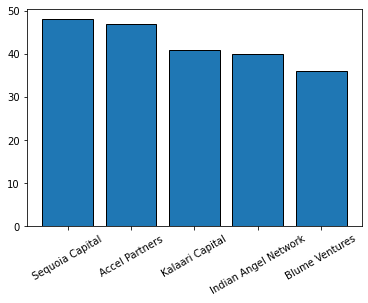

In [8]:
# plot a bar graph between top 5 Investors names and how many times they invest in 
# different startups
index=top_investors.index[0:5]
values=[]
for i in range(5):
    values.append(top_investors.values[i][0])
plt.bar(index,values,edgecolor="black")
plt.xticks(rotation=30)
plt.show()

# ANSWER - 4

In [9]:
# copy data in a different variable, so that data does not alter
data_file=data.copy()

# Correcting the errors in 'InvestmentType' 
data_file['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data_file['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data_file['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

# Correcting the errors in startup names of important startups Ola,Oyo,Flipkart,Paytm
# by replace the error name with correct name
data_file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data_file['StartupName'].replace('Olacabs','Ola',inplace=True)
data_file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data_file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data_file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data_file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

# drop that rows where "InvestorsName" have nan values or undisclosed investors.
# or "InvestmentType" has nan values
index=data_file[(data_file["InvestorsName"].isna()) 
               | (data_file["InvestmentType"].isna())
               |(data_file["InvestorsName"]=="Undisclosed Investors")
               |(data_file["InvestorsName"]=="Undisclosed investors")].index
data_file.drop(index,inplace=True)

# select that row where "InvestmentType" is crowd Funding or Seed Funding
data_file=data_file[(data_file["InvestmentType"]=="Crowd Funding") 
                    | (data_file["InvestmentType"]=="Seed Funding")]

# Reset the index
data_file=data_file.reset_index(drop=True)

# Count the how many times investors invest in different companies
def investor_startup(arr1,arr2):
    d={}
    l=[]
    for i in range(len(arr1)):
        if ',' not in arr1[i]:
            if (arr1[i],arr2[i]) not in l:
                d[arr1[i]]=d.get(arr1[i],0)+1
                l.append((arr1[i],arr2[i]))
        else:
            string=arr1[i].strip().split(',')
            for j in string:
                if (j.strip(),arr2[i]) not in l and j.strip()!='':
                    d[j.strip()]=d.get(j.strip(),0)+1
                    l.append((j.strip(),arr2[i]))
    return d
investor_startup_count=investor_startup(data_file['InvestorsName'],data_file["StartupName"])

# Construct a Dataframe of keys and values of invester_startups_count and store in 'df'
df=pd.DataFrame(list(investor_startup_count.values()),list(investor_startup_count.keys()))

# Sort value of investors in descending order and store in 'top_investors'
top_investors=df.sort_values(by=0,ascending=False)

# print top 5 investors and how many times they invest
for i in range(5):
    print(top_investors.index[i],top_investors.values[i][0])

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


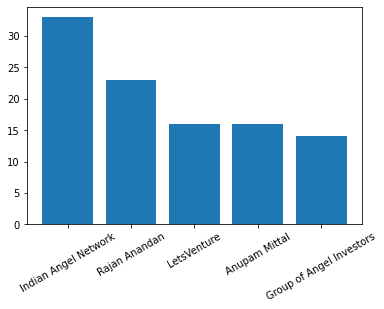

In [10]:
# plot a bar graph between top 5 Investors names and how many times they invest in 
# different startups where Investment Type is Crowd funding or Seed Funding
index=top_investors.index[0:5]
values=[]
for i in range(5):
    values.append(top_investors.values[i][0])
plt.bar(index,values)
plt.xticks(rotation=30)
plt.show()

# ANSWER - 5

In [11]:
# copy data in a different variable, so that data does not alter
data_file=data.copy()

# Correcting the errors in 'InvestmentType' 
data_file['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data_file['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data_file['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

# Correcting the errors in startup names of important startups Ola,Oyo,Flipkart,Paytm
# by replace the error name with correct name
data_file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data_file['StartupName'].replace('Olacabs','Ola',inplace=True)
data_file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data_file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data_file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data_file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

# drop that rows where "InvestorsName" have nan values or undisclosed investors.
# or "InvestmentType" has nan values
index=data_file[(data_file["InvestorsName"].isna()) 
               | (data_file["InvestmentType"].isna())
               |(data_file["InvestorsName"]=="Undisclosed Investors")
               |(data_file["InvestorsName"]=="Undisclosed investors")].index
data_file.drop(index,inplace=True)

# select that row where "InvestmentType" is Private Equity
data_file=data_file[(data_file["InvestmentType"]=="Private Equity") ]

# Reset the index
data_file=data_file.reset_index(drop=True)

# Count the how many times investors invest in different companies
def investor_startup(arr1,arr2):
    d={}
    l=[]
    for i in range(len(arr1)):
        if ',' not in arr1[i]:
            if (arr1[i],arr2[i]) not in l:
                d[arr1[i]]=d.get(arr1[i],0)+1
                l.append((arr1[i],arr2[i]))
        else:
            string=arr1[i].strip().split(',')
            for j in string:
                if (j.strip(),arr2[i]) not in l and j.strip()!='':
                    d[j.strip()]=d.get(j.strip(),0)+1
                    l.append((j.strip(),arr2[i]))
    return d
investor_startup_count=investor_startup(data_file['InvestorsName'],data_file["StartupName"])

# Construct a Dataframe of keys and values of invester_startups_count and store in 'df'
df=pd.DataFrame(list(investor_startup_count.values()),list(investor_startup_count.keys()))

# Sort value of investors in descending order and store in 'top_investors'
top_investors=df.sort_values(by=0,ascending=False)

# print top 5 investors and how many times they invest
for i in range(5):
    print(top_investors.index[i],top_investors.values[i][0])

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


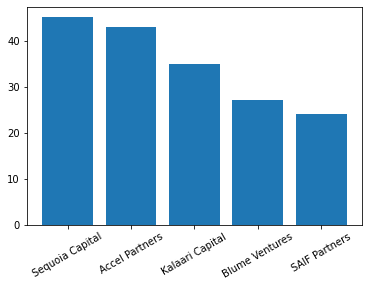

In [12]:
# plot a bar graph between top 5 Investors names and how many times they invest in 
# different startups where Investment Type is Private Equity
index=top_investors.index[0:5]
values=[]
for i in range(5):
    values.append(top_investors.values[i][0])
plt.bar(index,values)
plt.xticks(rotation=30)
plt.show()